In [61]:
import pandas_datareader as pdr

In [63]:
df = pdr.get_data_tiingo('GOOGL', api_key="your_tiingo_API_key")

In [68]:
df.to_csv('GOOGL.csv')

In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('GOOGL.csv')

In [71]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,GOOGL,2016-07-08 00:00:00+00:00,717.78,717.9000,708.110,710.56,1497323,717.78,717.9000,708.110,710.56,1497323,0.0,1.0
1,1,GOOGL,2016-07-11 00:00:00+00:00,727.20,728.9289,718.865,719.42,1441113,727.20,728.9289,718.865,719.42,1441113,0.0,1.0
2,2,GOOGL,2016-07-12 00:00:00+00:00,732.51,735.6000,727.500,731.92,1328680,732.51,735.6000,727.500,731.92,1328680,0.0,1.0
3,3,GOOGL,2016-07-13 00:00:00+00:00,729.48,735.5200,729.020,735.52,1021827,729.48,735.5200,729.020,735.52,1021827,0.0,1.0
4,4,GOOGL,2016-07-14 00:00:00+00:00,735.80,736.1400,730.590,733.94,1070351,735.80,736.1400,730.590,733.94,1070351,0.0,1.0


In [72]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,1252,GOOGL,2021-06-29 00:00:00+00:00,2445.45,2460.415,2433.8150,2453.4071,1155436,2445.45,2460.415,2433.8150,2453.4071,1155436,0.0,1.0
1253,1253,GOOGL,2021-06-30 00:00:00+00:00,2441.79,2445.140,2427.0900,2439.8900,1223699,2441.79,2445.140,2427.0900,2439.8900,1223699,0.0,1.0
1254,1254,GOOGL,2021-07-01 00:00:00+00:00,2448.89,2451.740,2430.6300,2434.5000,905641,2448.89,2451.740,2430.6300,2434.5000,905641,0.0,1.0
1255,1255,GOOGL,2021-07-02 00:00:00+00:00,2505.15,2508.080,2461.1900,2463.0000,1300109,2505.15,2508.080,2461.1900,2463.0000,1300109,0.0,1.0
1256,1256,GOOGL,2021-07-06 00:00:00+00:00,2523.80,2528.560,2491.6501,2512.9700,1320179,2523.80,2528.560,2491.6501,2512.9700,1320179,0.0,1.0


In [73]:
df1 = df.reset_index()['close']

In [74]:
df1.shape

(1257,)

In [75]:
df1

0        717.78
1        727.20
2        732.51
3        729.48
4        735.80
         ...   
1252    2445.45
1253    2441.79
1254    2448.89
1255    2505.15
1256    2523.80
Name: close, Length: 1257, dtype: float64

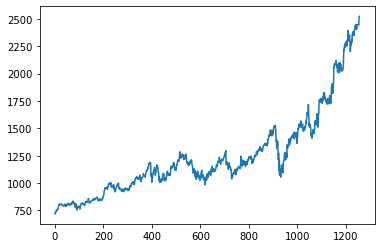

In [76]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [77]:
import numpy as np

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [79]:
df1.shape

(1257, 1)

In [80]:
df1

array([[0.        ],
       [0.00521589],
       [0.00815606],
       ...,
       [0.95852205],
       [0.98967343],
       [1.        ]])

In [81]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]

In [82]:
training_size

817

In [83]:
test_size

440

In [84]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [85]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [86]:
print(X_train)

[[0.         0.00521589 0.00815606 ... 0.03389774 0.0345788  0.03765739]
 [0.00521589 0.00815606 0.00647833 ... 0.0345788  0.03765739 0.03967841]
 [0.00815606 0.00647833 0.00997774 ... 0.03765739 0.03967841 0.03217019]
 ...
 [0.24927188 0.24908916 0.23189666 ... 0.29042314 0.28137562 0.27871231]
 [0.24908916 0.23189666 0.22540171 ... 0.28137562 0.27871231 0.27032923]
 [0.23189666 0.22540171 0.25083886 ... 0.27871231 0.27032923 0.25478123]]


In [87]:
X_train.shape, Y_train.shape

((716, 100), (716,))

In [99]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [101]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 64, verbose = 1) 

Epoch 1/10
12/12 [==============================] - 7s 280ms/step - loss: 0.0104 - val_loss: 0.0815
Epoch 2/10
12/12 [==============================] - 2s 186ms/step - loss: 0.0021 - val_loss: 0.0209
Epoch 3/10
12/12 [==============================] - 2s 182ms/step - loss: 0.0011 - val_loss: 0.0198
Epoch 4/10
12/12 [==============================] - 2s 185ms/step - loss: 6.6963e-04 - val_loss: 0.0116
Epoch 5/10
12/12 [==============================] - 2s 181ms/step - loss: 5.1494e-04 - val_loss: 0.0046
Epoch 6/10
12/12 [==============================] - 2s 179ms/step - loss: 4.8931e-04 - val_loss: 0.0040
Epoch 7/10
12/12 [==============================] - 2s 186ms/step - loss: 4.7791e-04 - val_loss: 0.0050
Epoch 8/10
12/12 [==============================] - 2s 185ms/step - loss: 4.4937e-04 - val_loss: 0.0064
Epoch 9/10
12/12 [==============================] - 2s 183ms/step - loss: 4.4915e-04 - val_loss: 0.0052
Epoch 10/10
12/12 [==============================] - 2s 182ms/step - loss: 4

In [104]:
import tensorflow as tf

In [105]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [106]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [107]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

1069.847822996956

In [108]:
math.sqrt(mean_squared_error(Y_test, test_predict))

1711.865302483079

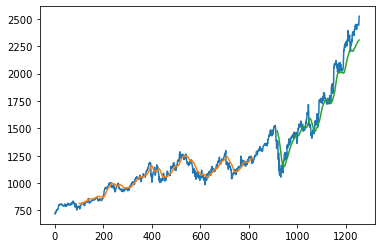

In [109]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [111]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [112]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8828321]
101
1 day input [0.76258845 0.77126499 0.77565033 0.76855738 0.75914442 0.74001395
 0.74325866 0.7563759  0.71880156 0.72210164 0.74854099 0.74567281
 0.71628775 0.72875716 0.76371801 0.71412277 0.73231747 0.73000853
 0.76563936 0.73765518 0.74011362 0.75642019 0.75549551 0.72178603
 0.72489784 0.72696316 0.73285456 0.72798197 0.72794321 0.72366308
 0.73532408 0.7357006  0.74458755 0.78182966 0.83120896 0.82583803
 0.84232179 0.84863401 0.85984098 0.84541699 0.85084883 0.84391646
 0.86791398 0.86652972 0.87041118 0.86445887 0.86409342 0.84979125
 0.87604235 0.88157938 0.8710867  0.90877177 0.92744266 0.90570426
 0.89993466 0.8798629  0.88425931 0.89676194 0.90483494 0.87151305
 0.85950322 0.82084916 0.83679029 0.86411003 0.86994607 0.85530061
 0.86030055 0.87992935 0.87283087 0.90987918 0.91089246 0.92054905
 0.91078726 0.90755916 0.92103077 0.91516705 0.90242633 0.92789116
 0.932725   0.9305877  0.93584789 0.95090309 0.94817333 0.95853313
 0.94717113 0.9400062  0.95075913 

10 day output [[0.8604483]]
11 day input [0.74854099 0.74567281 0.71628775 0.72875716 0.76371801 0.71412277
 0.73231747 0.73000853 0.76563936 0.73765518 0.74011362 0.75642019
 0.75549551 0.72178603 0.72489784 0.72696316 0.73285456 0.72798197
 0.72794321 0.72366308 0.73532408 0.7357006  0.74458755 0.78182966
 0.83120896 0.82583803 0.84232179 0.84863401 0.85984098 0.84541699
 0.85084883 0.84391646 0.86791398 0.86652972 0.87041118 0.86445887
 0.86409342 0.84979125 0.87604235 0.88157938 0.8710867  0.90877177
 0.92744266 0.90570426 0.89993466 0.8798629  0.88425931 0.89676194
 0.90483494 0.87151305 0.85950322 0.82084916 0.83679029 0.86411003
 0.86994607 0.85530061 0.86030055 0.87992935 0.87283087 0.90987918
 0.91089246 0.92054905 0.91078726 0.90755916 0.92103077 0.91516705
 0.90242633 0.92789116 0.932725   0.9305877  0.93584789 0.95090309
 0.94817333 0.95853313 0.94717113 0.9400062  0.95075913 0.9326807
 0.95152324 0.95725961 0.95500604 0.95913667 0.95923079 0.95953533
 0.95661731 0.95459076

20 day output [[0.82135934]]
21 day input [0.74011362 0.75642019 0.75549551 0.72178603 0.72489784 0.72696316
 0.73285456 0.72798197 0.72794321 0.72366308 0.73532408 0.7357006
 0.74458755 0.78182966 0.83120896 0.82583803 0.84232179 0.84863401
 0.85984098 0.84541699 0.85084883 0.84391646 0.86791398 0.86652972
 0.87041118 0.86445887 0.86409342 0.84979125 0.87604235 0.88157938
 0.8710867  0.90877177 0.92744266 0.90570426 0.89993466 0.8798629
 0.88425931 0.89676194 0.90483494 0.87151305 0.85950322 0.82084916
 0.83679029 0.86411003 0.86994607 0.85530061 0.86030055 0.87992935
 0.87283087 0.90987918 0.91089246 0.92054905 0.91078726 0.90755916
 0.92103077 0.91516705 0.90242633 0.92789116 0.932725   0.9305877
 0.93584789 0.95090309 0.94817333 0.95853313 0.94717113 0.9400062
 0.95075913 0.9326807  0.95152324 0.95725961 0.95500604 0.95913667
 0.95923079 0.95953533 0.95661731 0.95459076 0.95852205 0.98967343
 1.         0.88283211 0.88392931 0.88406628 0.88320833 0.88144928
 0.87894166 0.87585217 0

29 day output [[0.7917933]]
[[0.8828321099281311], [0.8839293122291565], [0.8840662837028503], [0.8832083344459534], [0.881449282169342], [0.8789416551589966], [0.8758521676063538], [0.8723368048667908], [0.8685296773910522], [0.8645391464233398], [0.8604483008384705], [0.856319010257721], [0.8521948456764221], [0.848105788230896], [0.8440707921981812], [0.8401014804840088], [0.8362045288085938], [0.8323822021484375], [0.82863450050354], [0.8249610066413879], [0.8213593363761902], [0.8178274035453796], [0.8143622279167175], [0.8109617829322815], [0.8076233863830566], [0.8043454885482788], [0.8011253476142883], [0.7979609966278076], [0.7948508858680725], [0.7917932868003845]]


In [113]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [114]:
len(df1)

1257

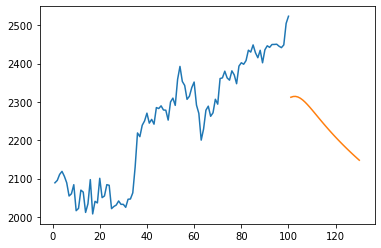

In [115]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


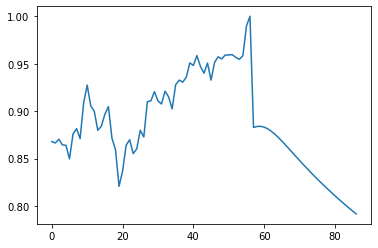

In [116]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [117]:
df3=scaler.inverse_transform(df3).tolist()


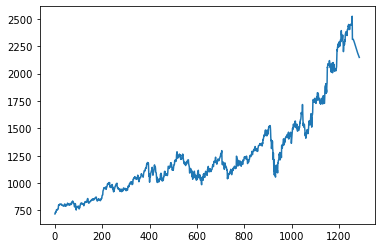

In [118]:
plt.plot(df3)